# Dimensionality Reduction

PCA, LDA

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.decomposition import PCA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from data_loader import SessionDataLoader
from spikes.filters import gaussian_filter, exp_filter
from spikes.binning import bin_spikes

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
data_loader = SessionDataLoader("GreBlu9508M", 1)

In [42]:
base_table = data_loader.load_table()

In [43]:
t_arr, spikes = bin_spikes(base_table["spike_times"], min_time=0.0, max_time=0.6)
spikes_filtered = gaussian_filter(spikes, 5.0)

base_table["binned_spikes"] = spikes.tolist()
base_table["psth"] = spikes_filtered.tolist()

In [44]:
table = base_table[base_table["unit"] == (14, 1)]

In [45]:
pca = PCA(n_components=2)

In [46]:
result = pca.fit_transform(table["psth"].tolist())

In [47]:
colors = np.unique(table["call_type"])
colors = [colors.searchsorted(x) for x in table["call_type"]]

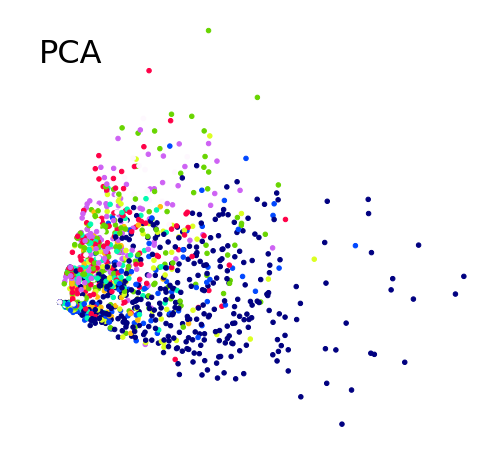

In [48]:
plt.figure(figsize=(8, 8))
plt.scatter(result[:, 0], result[:, 1], c=colors, s=20, cmap="gist_ncar")
plt.axis("off")
plt.text(plt.xlim()[0], plt.ylim()[1] * 0.8, "PCA", fontsize=32)
plt.show()

### LDA for call category labels

In [58]:
stims = np.unique(table["stim"])
call_types = np.unique(table["call_type"])

In [59]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [60]:
X_lda = lda.fit_transform(
    table["psth"].tolist(),
    # each datapoint labeled by the index of the category
    [call_types.searchsorted(x) for x in table["call_type"]])

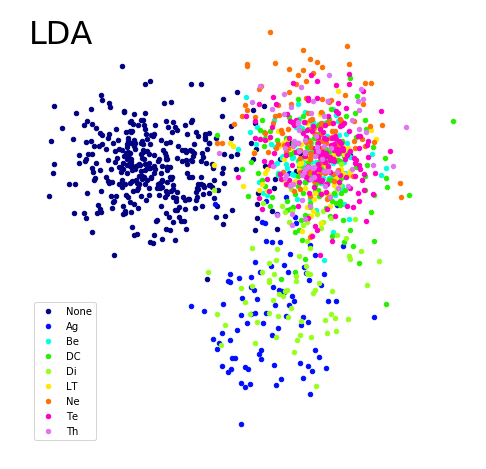

In [61]:
plt.figure(figsize=(8, 8))

# To plot without a legend, can just do:
# plt.scatter(X_lda[:, 0], X_lda[:, 1], c=colors, s=20, cmap="gist_ncar")

for idx, call_type in enumerate(call_types):
    selector = table["call_type"] == call_type if call_type else table["call_type"].isnull()
    color = cm.gist_ncar(idx / float(len(call_types)))
    plt.scatter(X_lda[selector][:, 0], X_lda[selector][:, 1], color=color,
               s=20, cmap="gist_ncar", label=call_type or "None")

plt.axis("off")
plt.text(plt.xlim()[0], plt.ylim()[1] * 0.8, "LDA", fontsize=32)
plt.legend()
plt.show()

### LDA for stimulus labels

In [62]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [63]:
X_lda = lda.fit_transform(
    table["psth"].tolist(),
    [stims.searchsorted(x) for x in table["stim"]])

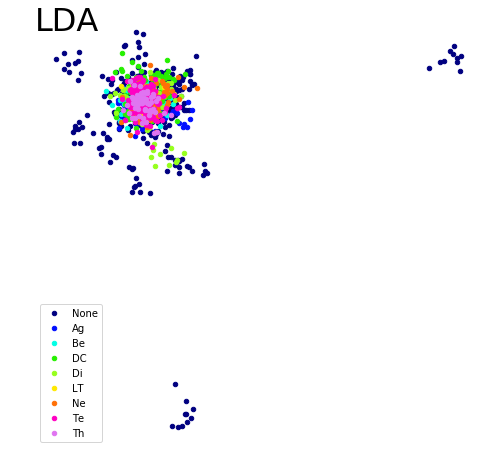

In [64]:
plt.figure(figsize=(8, 8))

# Here, I will still color-code by call type, but run
# LDA on the stimulus (too many stimuli to color nicely)
for idx, call_type in enumerate(call_types):
    selector = table["call_type"] == call_type if call_type else table["call_type"].isnull()
    color = cm.gist_ncar(idx / float(len(call_types)))
    plt.scatter(X_lda[selector][:, 0], X_lda[selector][:, 1], color=color,
               s=20, cmap="gist_ncar", label=call_type or "None")

plt.axis("off")
plt.text(plt.xlim()[0], plt.ylim()[1] * 0.8, "LDA", fontsize=32)
plt.legend(loc="lower left")
plt.show()